# AI240 Final Project Resubmission

Mark Reyno

Dataset Link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


We are going to make a classifier that decides of a customer will be satisfied with the airline and the service. This dataset is coming from Kaggle and it includes various columns which include flight distance, wifi service, seat comfort, and more. This would be great for any airline because if they can get a grasp on what makes a customer satisfied, then they will be able to increase those options and in turn create more revenue for the airline. We are going to be using a logistic regression and kneighbors classifier.

## Import Libaries

Let's import all the libaries that we might need to make the model.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airline = pd.read_csv('airline.csv')

Let's call the dataframe to check if it was properly imported

In [3]:
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Data Exploration

Let's explore the data and see what we have to work with and any changes that need to be made to clean it up.

In [4]:
airline.shape

(25976, 25)

It looks like there are 25,976 rows and 25 columns in this dataframe. That is alot of data.

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Looks like we have to change some datatypes. The object types need to be changed into a int/float so our machine learning model can use it. 

Another thing that we need to do is standarize the column names.

In [6]:
airline.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


We will need to fill in those values in the arrival delayed in minutes column

In [7]:
airline[airline.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


Looks like there are no duplicated values. 

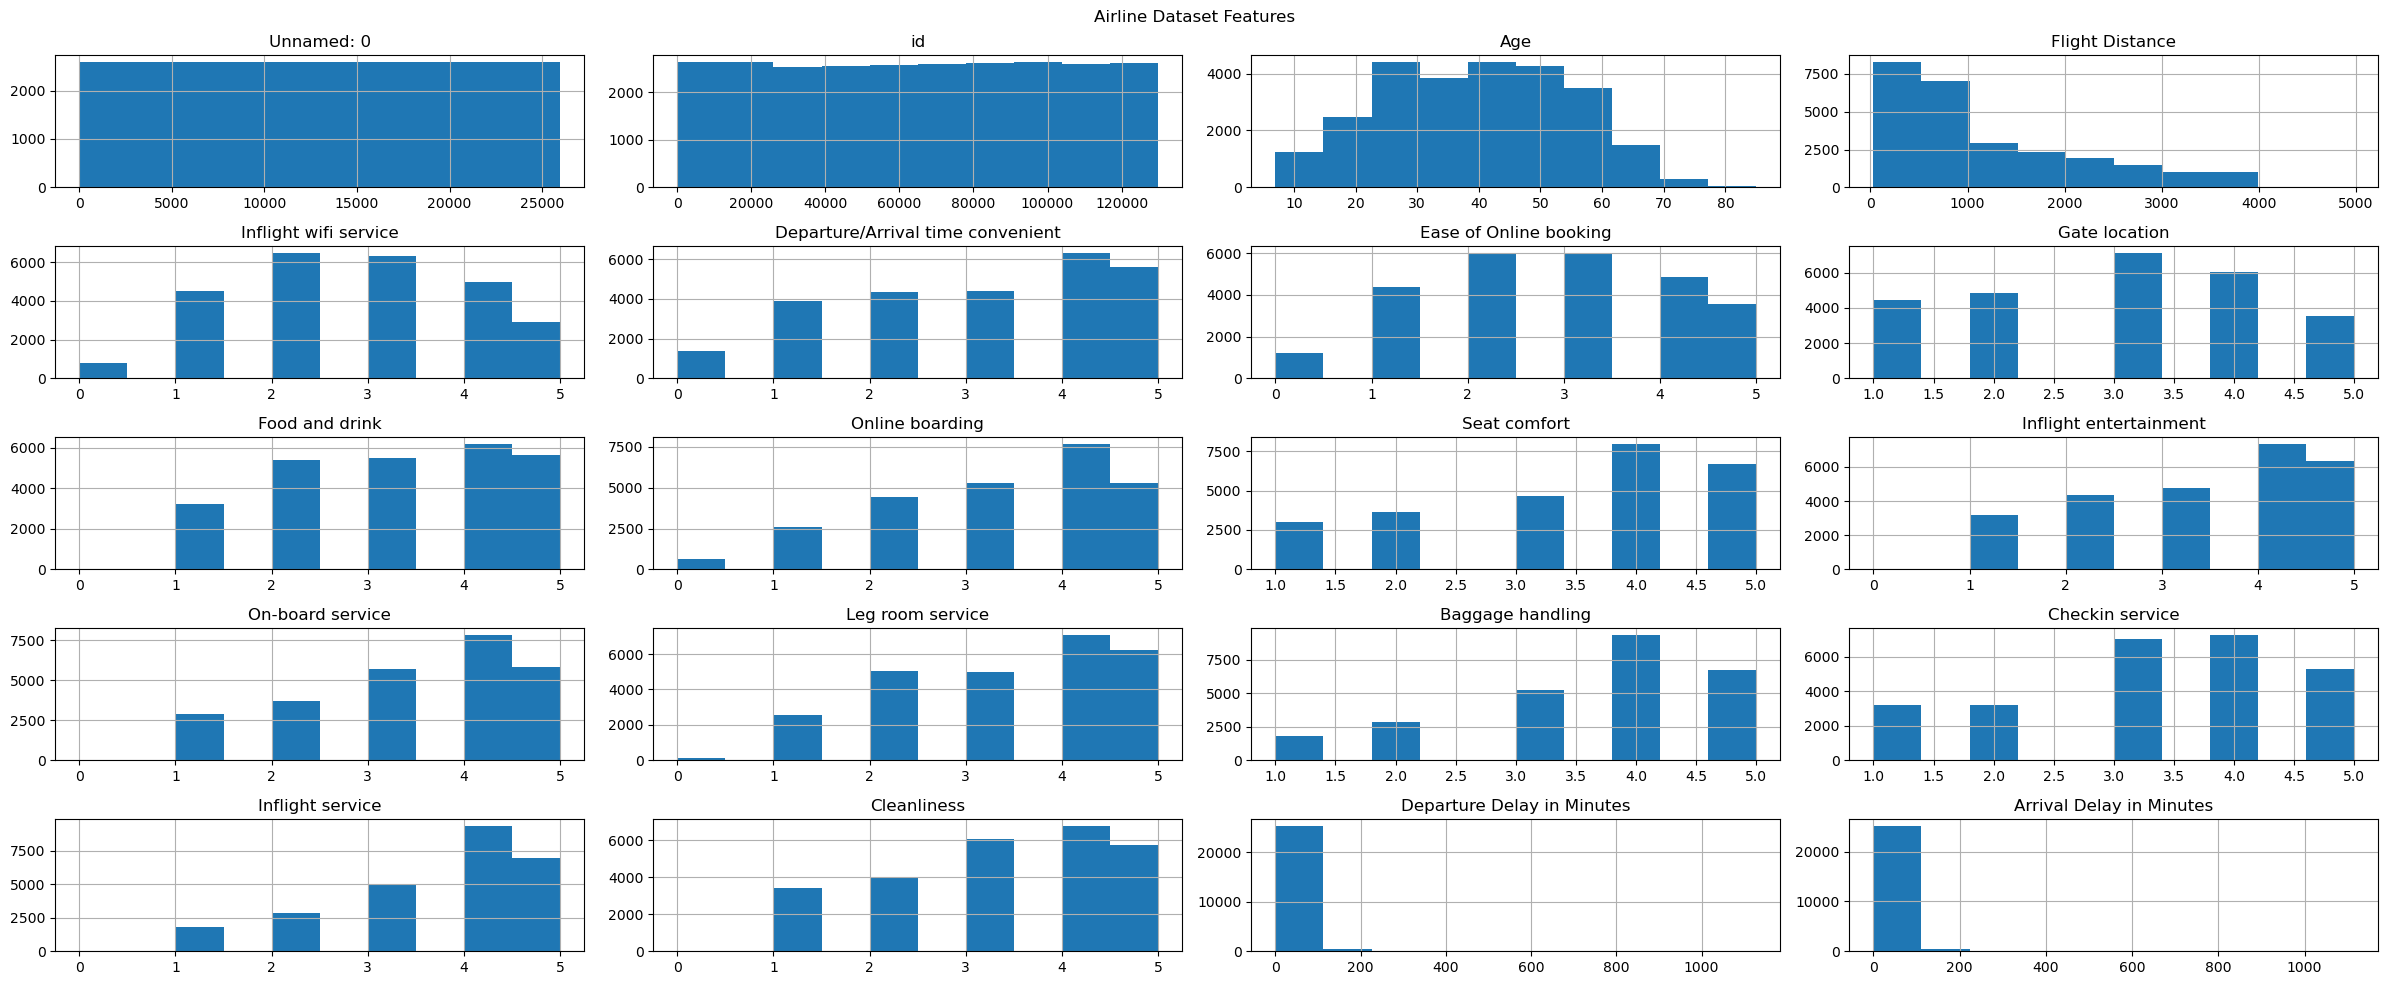

In [8]:
airline.hist(figsize=(24, 10))
plt.suptitle("Airline Dataset Features")
plt.tight_layout()
plt.show()

In [9]:
counts = airline['satisfaction'].value_counts()
print(airline['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64


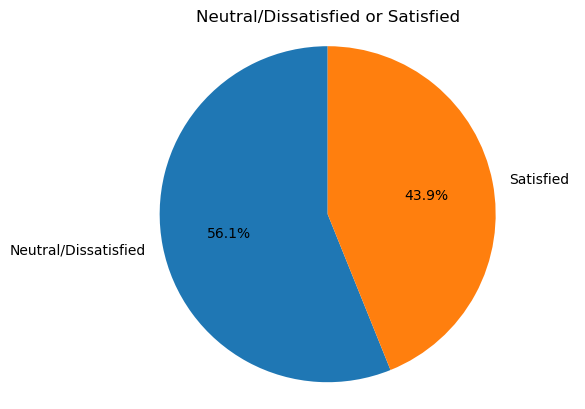

In [10]:
labels = ['Neutral/Dissatisfied', 'Satisfied']

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Neutral/Dissatisfied or Satisfied')
plt.axis('equal')  
plt.show()

In [11]:
airline.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


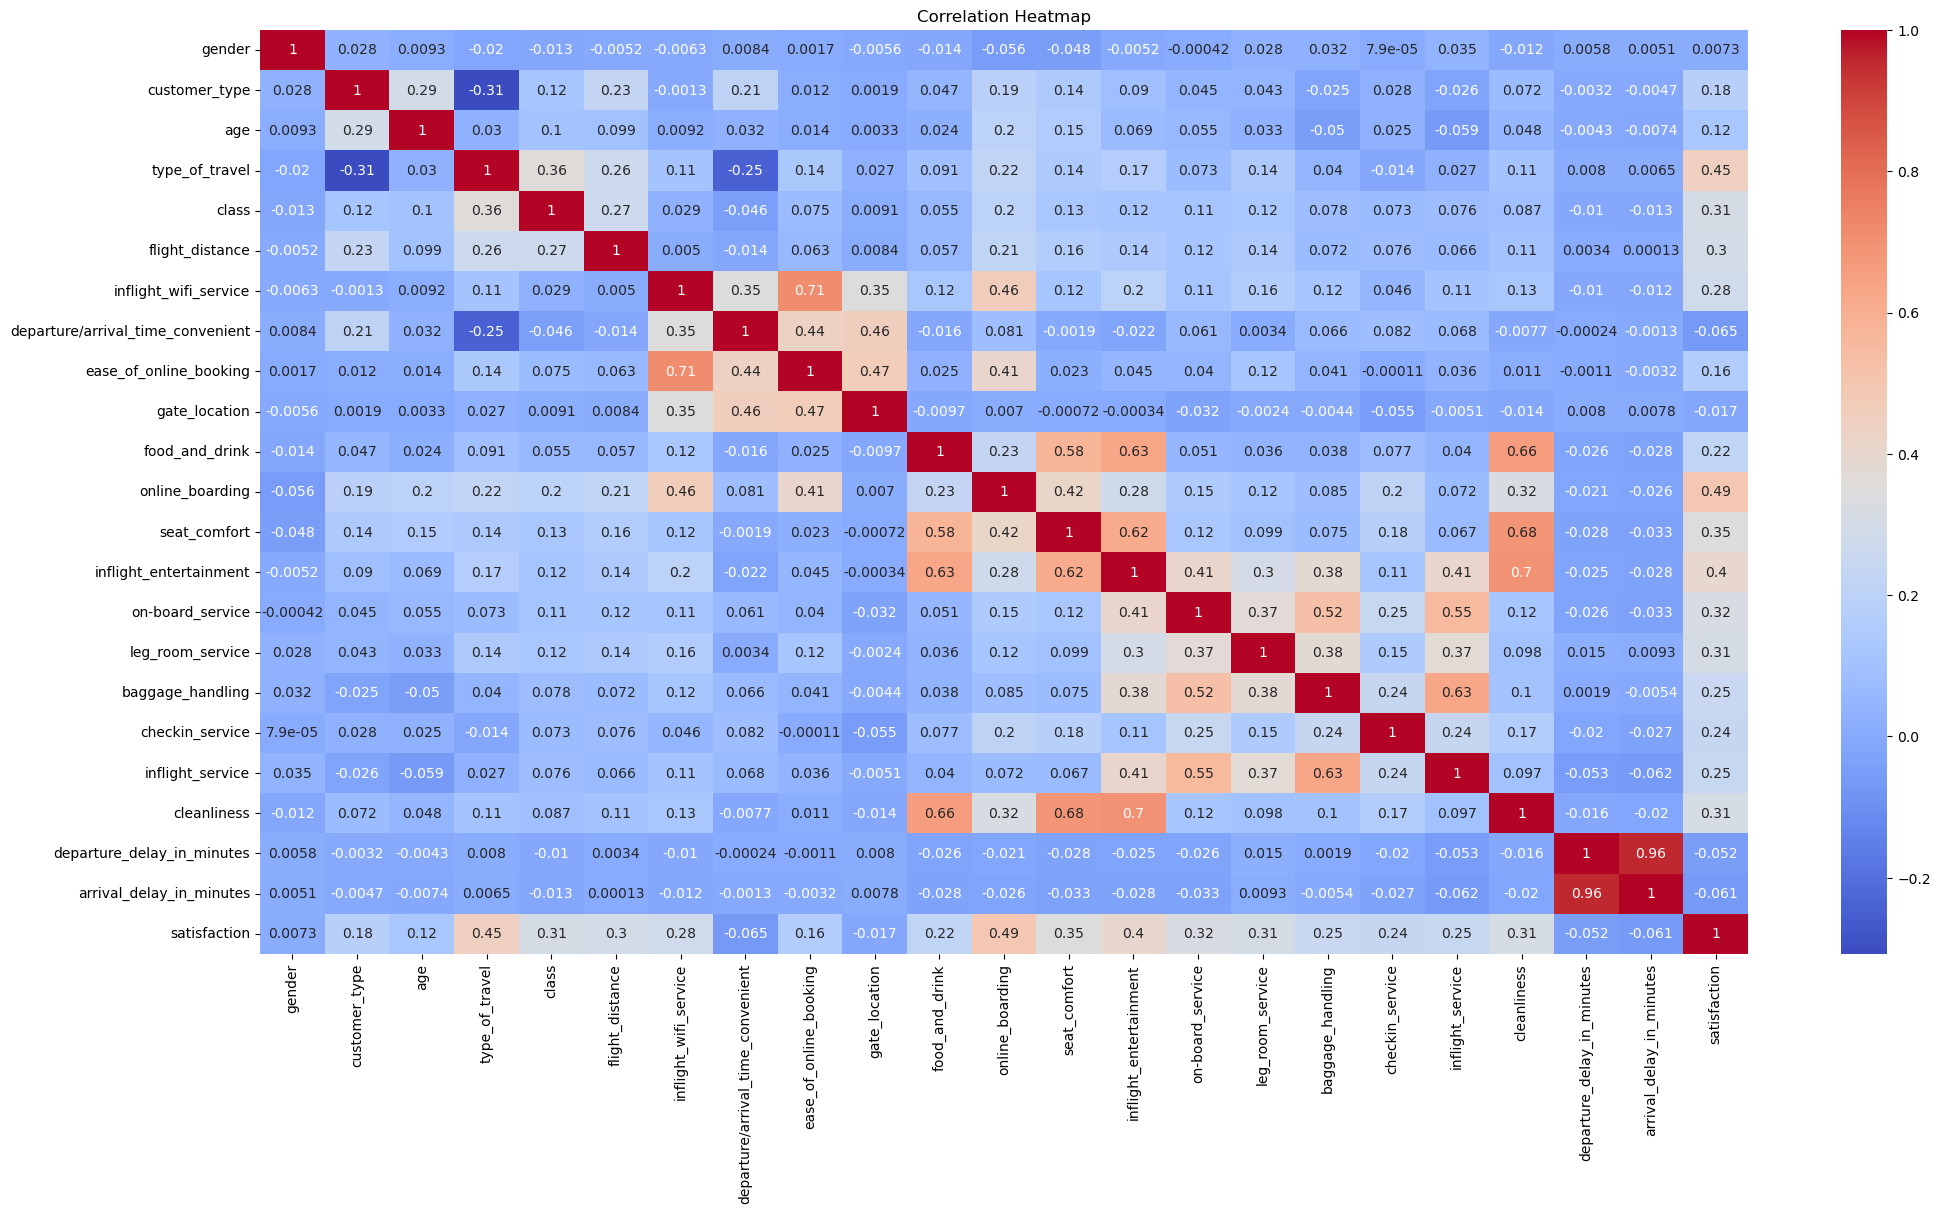

In [43]:
plt.figure(figsize=(24, 12))
corr = airline.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

We can see that the values are don't have that much correlation across the board, except in some areas. For example, it seems that there is a strong correlation between arrival delay and departure delay. We can guess that having both of these doesn't provide a lot of satisfaction, it may be something that the airline may want to keep to a minimum

# Data Preprocessing

Let's start making changes to the dataframe. First let's drop the id and unnamed: 0 columns because it's not relevant to what we are trying to do.

In [12]:
airline = airline.drop(['id', 'Unnamed: 0'], axis=1)

In [13]:
airline.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

Let's standarize the names of the columns.

In [15]:
airline.columns = airline.columns.str.strip().str.lower().str.replace(' ', '_')

In [16]:
airline.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

Time to check what the unqiue values are in the object dtype columns

In [17]:
airline[['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']].nunique()

gender            2
customer_type     2
type_of_travel    2
class             3
satisfaction      2
dtype: int64

Let's check the unique values in the class column

In [18]:
airline['class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

Now we need to change those columns with the object dtype

In [19]:
airline['gender'] = airline['gender'].map({'Male': 1, 'Female': 0})

In [20]:
airline['customer_type'] = airline['customer_type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})

In [21]:
airline['type_of_travel'] = airline['type_of_travel'].map({'Business travel': 1, 'Personal Travel': 0})

In [22]:
airline['satisfaction'] = airline['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [23]:
airline['class'] = airline['class'].map({'Eco': 0, 'Business': 1, 'Eco Plus': 2})

In [24]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             25976 non-null  int64  
 1   customer_type                      25976 non-null  int64  
 2   age                                25976 non-null  int64  
 3   type_of_travel                     25976 non-null  int64  
 4   class                              25976 non-null  int64  
 5   flight_distance                    25976 non-null  int64  
 6   inflight_wifi_service              25976 non-null  int64  
 7   departure/arrival_time_convenient  25976 non-null  int64  
 8   ease_of_online_booking             25976 non-null  int64  
 9   gate_location                      25976 non-null  int64  
 10  food_and_drink                     25976 non-null  int64  
 11  online_boarding                    25976 non-null  int

We have successfully changed the values in those columns

Now we have to fill in the null values for the arrival delay in minutes

In [25]:
airline['arrival_delay_in_minutes'] = airline['arrival_delay_in_minutes'].fillna(airline['arrival_delay_in_minutes'].mean())

# Modeling

Let's import the libraries that we will need for modeling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

We are going to be logistic regression model

In [27]:
X = airline.drop('satisfaction', axis=1)
y = airline['satisfaction']

We separated the value satisfaction because it is the target. 

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
inputs = X

Let's split the data into test and train

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\reyno\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Evaluation

Import what we will need to evaluate the model

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 ... 1 1 0]


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7648190916089299


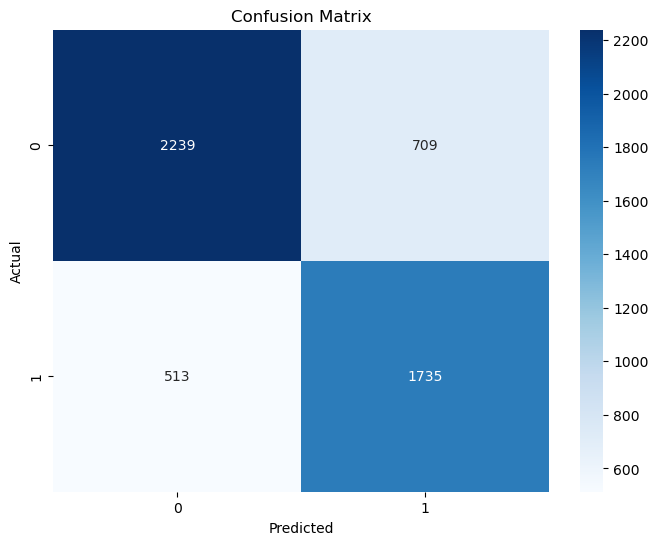

In [34]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

looks like there were 1,222 from our test data that were incorrectly labeled, but 1735 true positives and 2239 true negatives.

In [37]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.7099018003273322
Recall: 0.771797153024911
F1 Score: 0.7395566922421143


It seems that our model is doing okay, but it's not very accurate. 

# 2nd Model

Since the first model is not that accurate, let's see if maybe a different model will be. This will be using KNN. Let's import the model.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

time to fit x and y into the model. 

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 0 ... 1 1 0]


In [57]:
accuracyknn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracyknn)

Accuracy: 0.8468052347959969


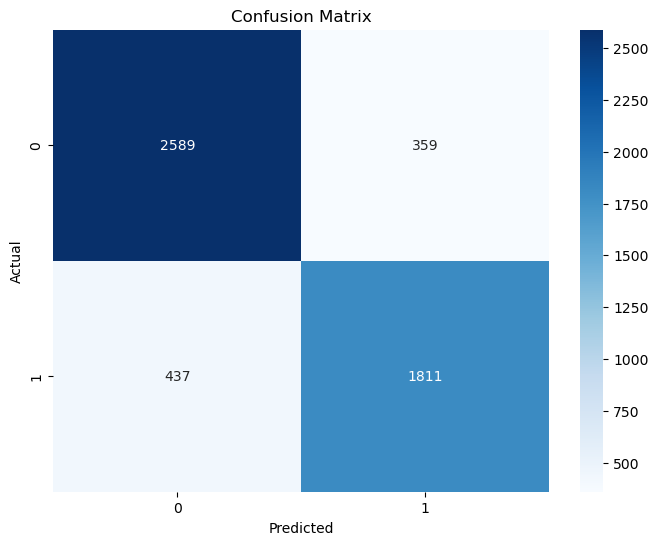

In [58]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

looks like there were 796 from our test data that were incorrectly labeled, but 1811 true positives and 2589 true negatives.

In [59]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.8345622119815668
Recall: 0.8056049822064056
F1 Score: 0.8198279764599367


Compared to the first model, it seems like this one is more accurate.  